In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from gensim.models import Word2Vec

In [3]:
df = pd.read_pickle('../../data/2-intermediate/corpus.plk')
corpus = df.text.tolist()
corpus = [' '.join(tweet) for tweet in corpus]

In [5]:
tfidf = TfidfVectorizer()
tfidf.fit(corpus)
vec = tfidf.transform(corpus)

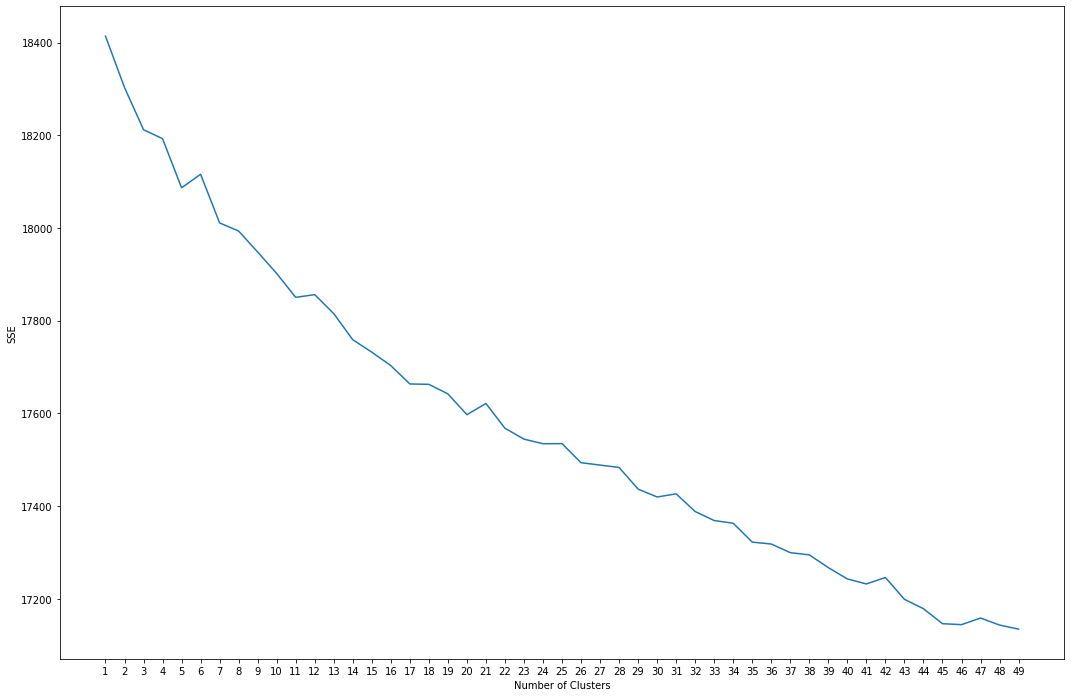

In [6]:
nks = 50
sse = []
for k in range(1, nks):
    means = KMeans(n_clusters=k)
    means.fit(vec)
    sse.append(means.inertia_)


plt.subplots(figsize=(18,12))
plt.plot(range(1, nks), sse)
plt.xticks(range(1, nks))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

/home/andre/Documents/scripts/fedbytweets-ml/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/andre/Documents/scripts/fedbytweets-ml/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/andre/Documents/scripts/fedbytweets-ml/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/andre/Documents/scripts/fedbytweets-ml/.venv/lib/python3.

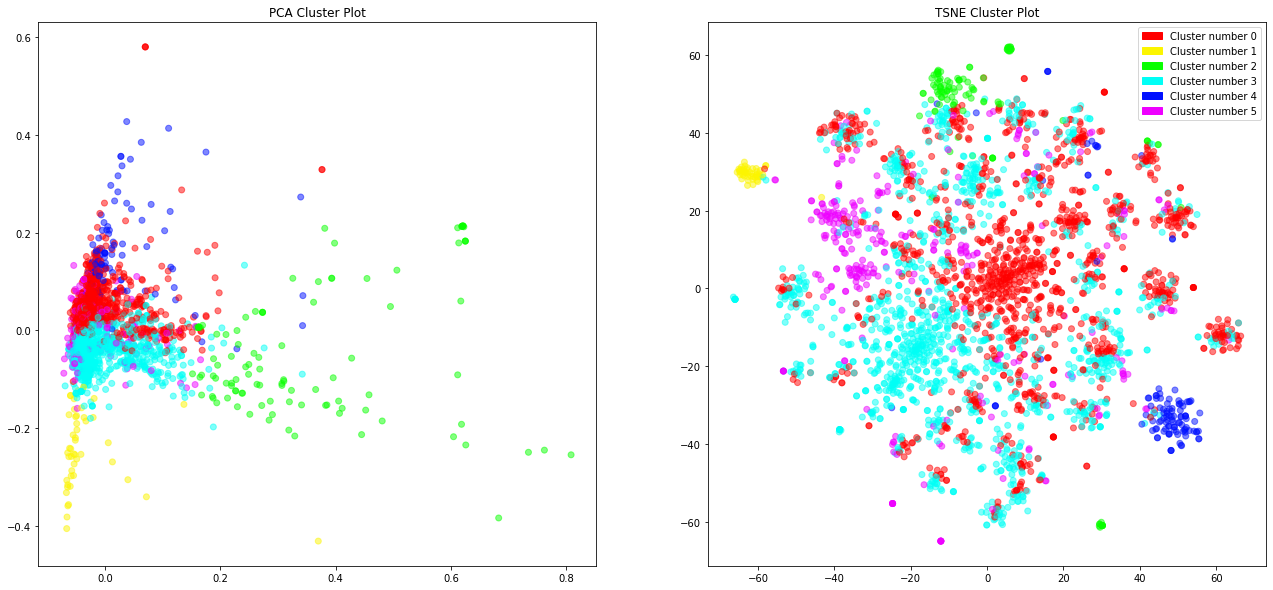

In [16]:
labels = KMeans(n_clusters=6).fit_predict(vec)


def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)
    label_subset = labels[max_items]

    legend_dict = {i: cm.hsv((i)/len(set(label_subset[idx]))) for i in set(label_subset[idx])}
    label_subset = [legend_dict[i] for i in label_subset[idx]]

    handles = [ mpatches.Patch(color=legend_dict[cluster], label=f'Cluster number {cluster}') for cluster in legend_dict]
    
    f, ax = plt.subplots(1, 2, figsize=(22, 10))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset, alpha=0.5)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset, alpha=0.5)
    ax[1].set_title('TSNE Cluster Plot')

    plt.legend(handles=handles)
    
plot_tsne_pca(vec, labels)

In [17]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(vec, labels, tfidf.get_feature_names(), 10)

/home/andre/Documents/scripts/fedbytweets-ml/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 0
anitta,brasil,poder,está,rizada,ladrão,falar,votar,suboficial,lula

Cluster 1
ver,saber,falar,poder,suboficial,brasil,está,bolsonaro,lula,rizar

Cluster 2
melhor,povo,mulher,13,direito,feminino,lula,bolsonaro,presidente,brasil

Cluster 3
poder,fora,querer,falar,brasil,lula,ver,governo,presidente,bolsonaro

Cluster 4
presidente,terceiro,ganhar,votar,eleger,segundo,bolsonaro,lula,primeiro,turno

Cluster 5
votar,ver,poder,falar,suplicy,querer,bolsonaro,lula,saber,dizer


In [18]:
import pickle

with open('../../data/4-models/vectorized_docs.pkl', 'rb') as file:
    vec = pickle.load(file)

len(vec), len(vec[0])

(18638, 50)

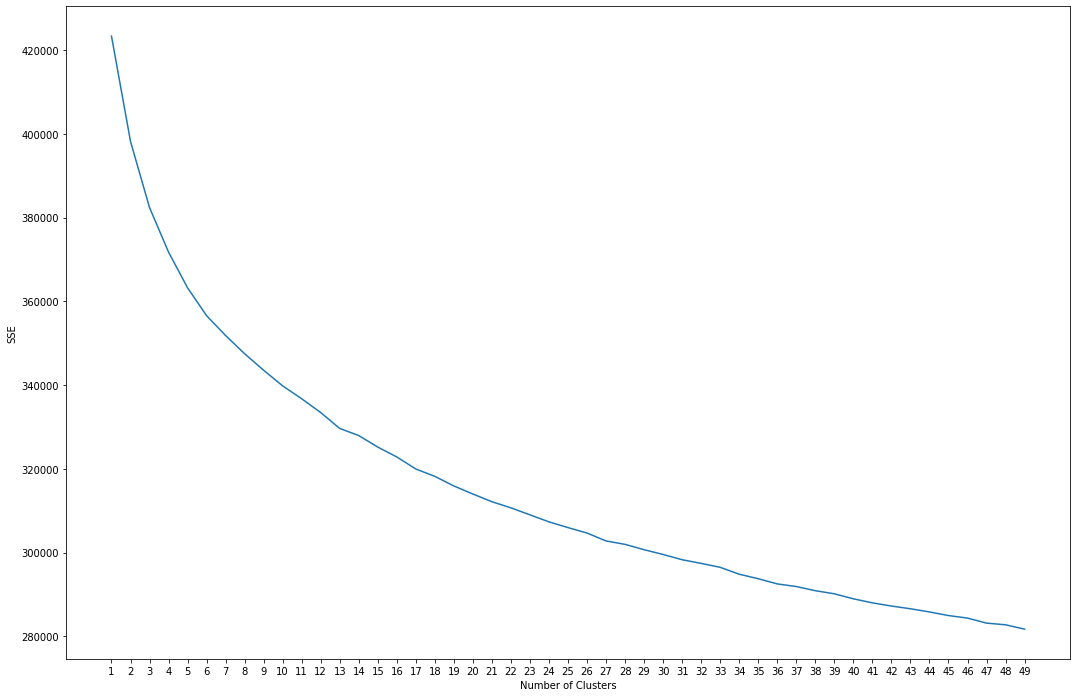

In [19]:
nks = 50
sse = []
for k in range(1, nks):
    means = KMeans(n_clusters=k)
    means.fit(vec)
    sse.append(means.inertia_)


plt.subplots(figsize=(18,12))
plt.plot(range(1, nks), sse)
plt.xticks(range(1, nks))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

/home/andre/Documents/scripts/fedbytweets-ml/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/andre/Documents/scripts/fedbytweets-ml/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


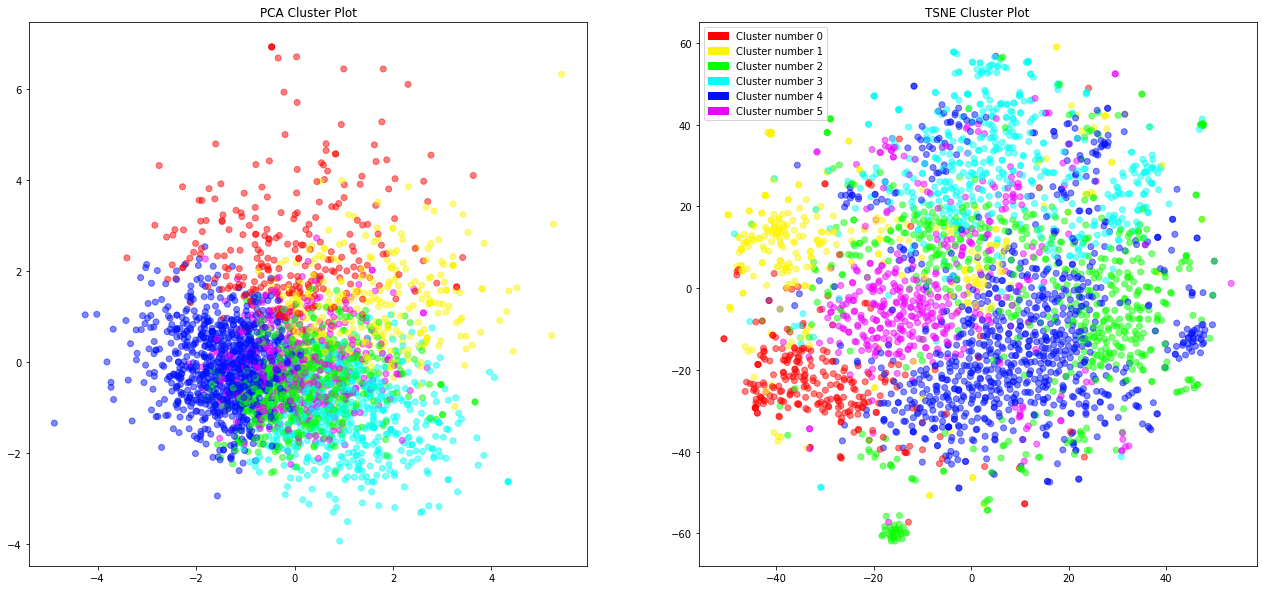

In [20]:

clustering = KMeans(n_clusters=6).fit(vec)
labels = clustering.labels_


def plot_tsne_pca(data, labels):
    
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(data[max_items,:])


    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)
    label_subset = labels[max_items]

    legend_dict = {i: cm.hsv((i)/len(set(label_subset[idx]))) for i in set(label_subset[idx])}
    label_subset = [legend_dict[i] for i in label_subset[idx]]

    handles = [ mpatches.Patch(color=legend_dict[cluster], label=f'Cluster number {cluster}') for cluster in legend_dict]


    f, ax = plt.subplots(1, 2, figsize=(22, 10))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset, alpha=0.5)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset, alpha=0.5)
    ax[1].set_title('TSNE Cluster Plot')

    plt.legend(handles=handles)
    

plot_tsne_pca(np.array(vec), labels)

In [25]:
model = Word2Vec.load("../../data/4-models/word2vec-finetuned.gensim")


print("Most representative terms per cluster (based on centroids):")
for i in range(6):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=10)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")


Most representative terms per cluster (based on centroids):
Cluster 0: turno votar eleição segundo voto vitória ciro 2 lula nulo 
Cluster 1: brasil barrosomentirosocompulsivo 22 soujovem60anosbolsonaro22 chegadeladrãoecorrupção esfumar capitar saberá em2022 vamosreconstruirobrasil 
Cluster 2: latir entediar rizada está ouvi-lo masturba cachorrinho lula cachorra berrar 
Cluster 3: bestalhões grampear prevaricação acusando-o acusador coação 9099 elucidar mariadorosario encarceradocombolsonaro 
Cluster 4: lula poder saber achar querer votar bolsonaro ainda tipo qualquer 
Cluster 5: governo país poder atual pagar privatizar pobre aumento bolsonaro deixar 


In [30]:
twt = pd.read_pickle('../../data/2-intermediate/tweets.pkl')
df = twt[twt.is_retweet == 0]
df = df.drop(columns=['import_date','file_name'])
df = df[df.lang=='pt']

corpus = pd.read_pickle('../../data/2-intermediate/corpus.plk')
corpus
df

,id,created_at,author_id,text,place_id,subject,is_retweet,created_at_date,created_at_time,emoji,lang
6,1542153434534641665,2022-06-29 14:30:05+00:00,1251632043764703245,@Jouberth19 #com Bolsonaro juntos,97bcdfca1a2dca59,bolsonaro,0,2022-06-29,14:30:05,NaN,pt
8,1542153432106164226,2022-06-29 14:30:04+00:00,1341510046929346566,"Toyjo: “Desde o início do governo Bolsonaro, B...",<NA>,bolsonaro,0,2022-06-29,14:30:04,NaN,pt
10,1542153431401521153,2022-06-29 14:30:04+00:00,1469115605257048064,@Eduardomg_95 Isso aqui que é fazer um Governo...,<NA>,bolsonaro,0,2022-06-29,14:30:04,NaN,pt
11,1542153431137361923,2022-06-29 14:30:04+00:00,42459902,DESMENTINDO BOLSONARO Serviço de Utilidade Pú...,68e019afec7d0ba5,bolsonaro,0,2022-06-29,14:30:04,NaN,pt
14,1542153429098831873,2022-06-29 14:30:03+00:00,1395125418651435011,@UOLNoticias Acho engraçado os bolsominions ju...,<NA>,bolsonaro,0,2022-06-29,14:30:03,NaN,pt
...,...,...,...,...,...,...,...,...,...,...,...
103128,1544447539071619073,2022-07-05 22:26:02+00:00,346927346,@lsentoes1 Será que o mito também não estaria ...,<NA>,lula,0,2022-07-05,22:26:02,NaN,pt
103139,1544447519601479680,2022-07-05 22:25:57+00:00,58943137,@Anaceli65806423 @ThiagoResiste Pelo mesmo mot...,<NA>,lula,0,2022-07-05,22:25:57,NaN,pt
103140,1544447517965926401,2022-07-05 22:25:57+00:00,1443602071,Coloca guardiões do Lula nisso #STFOrganizacao...,<NA>,lula,0,2022-07-05,22:25:57,NaN,pt
103143,1544447516057501696,2022-07-05 22:25:56+00:00,727669276207923200,@JanainaDoBrasil Eu tb elogio o presidente Lul...,<NA>,lula,0,2022-07-05,22:25:56,NaN,pt
